In [1]:
from utils import train_utils, data_utils
import tensorflow as tf
from config import *
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = train_utils.get_model()

make new model


2023-06-04 23:48:25.787676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:25.802330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:25.802491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:25.803060: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: YOLOv4


o
2023-06-04 23:48:26.084009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:26.084142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:26.084244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 23:48:26.084342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19541 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:0e:00.0, compute capability: 8.6


In [2]:
dataloader = data_utils.DataLoader(batch_size=BATCH_SIZE)
test_dataset = dataloader('train', use_label=True)

2023-06-05 01:14:37.448796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 01:14:37.465655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 01:14:37.465800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 01:14:37.466275: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Dataset: custom train
./data/custom/train.tfrecord is exist


In [3]:
data = next(iter(test_dataset))

In [4]:
images, s_grids, m_grids, l_grids, labels = data

4 1 0 1


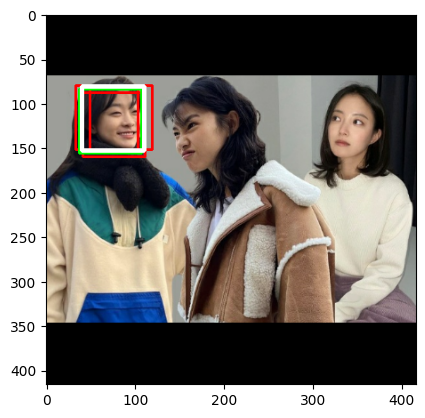

In [17]:
for i, (image, s_grid, m_grid, l_grid, label) in enumerate(zip(images.numpy()*255, s_grids, m_grids, l_grids, labels)):
    if i==4:
        image = image.astype(np.int32)

        s_grid = np.reshape(s_grid, [-1, 11])
        m_grid = np.reshape(m_grid, [-1, 11])
        l_grid = np.reshape(l_grid, [-1, 11])

        ss = 0 
        for s in s_grid:
            if s[4] != 0:
                p1 = (s[..., :2] - 0.5 * s[..., 2:4]).astype(np.int32)
                p2 = (s[..., :2] + 0.5 * s[..., 2:4]).astype(np.int32)
                cv2.rectangle(image, p1, p2, (255, 0, 0), 2)
                ss += 1

        mm = 0
        for m in m_grid:
            if m[4] != 0:
                p1 = (m[..., :2] - 0.5 * m[..., 2:4]).astype(np.int32)
                p2 = (m[..., :2] + 0.5 * m[..., 2:4]).astype(np.int32)
                cv2.rectangle(image, p1, p2, (0, 255, 0), 2)
                mm += 1

        ll = 0
        for l in l_grid:
            if l[4] != 0:
                p1 = (l[..., :2] - 0.5 * l[..., 2:4]).astype(np.int32)
                p2 = (l[..., :2] + 0.5 * l[..., 2:4]).astype(np.int32)
                cv2.rectangle(image, p1, p2, (0, 0, 255), 2)
                ll += 1

        gg = 0
        for g in label.numpy():
            if g[4] != 0:
                p1 = (g[..., :2] - 0.5 * g[..., 2:4]).astype(np.int32)
                p2 = (g[..., :2] + 0.5 * g[..., 2:4]).astype(np.int32)
                cv2.rectangle(image, p1, p2, (255, 255, 255), 3)
                gg += 1
        plt.imshow(image)
        print(ss, mm, ll, gg)
plt.show()